In [680]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

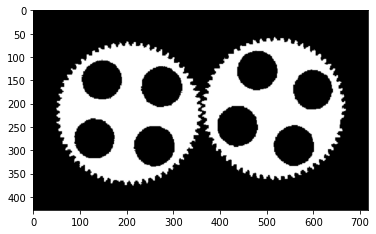

In [681]:
B = cv2.imread("Gears.png")
plt.imshow(B)


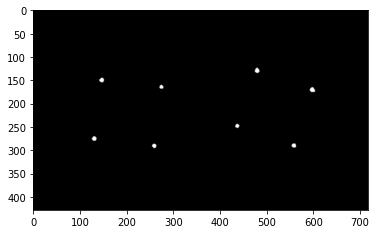

In [682]:
ellipse1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (100, 100))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = ( 4, 4))
ellipse2 = cv2.erode(ellipse1, kernel)
holeRing = cv2.subtract(ellipse1,ellipse2)
B1 = cv2.erode(B, holeRing)
plt.imshow(B1)

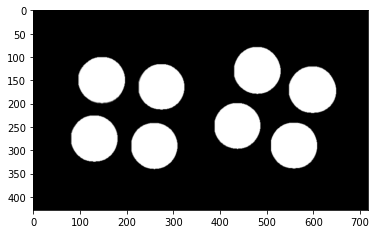

In [683]:
holeMask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (90, 90))
B2 = cv2.dilate(B1, holeMask)
plt.imshow(B2)

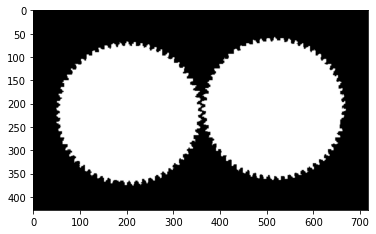

In [684]:
B3 = cv2.bitwise_or(B, B2)

plt.imshow(B3)

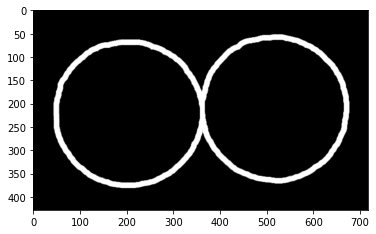

In [685]:
gearBody = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (50, 50))
samplingRingSpacer = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (6, 6))
samplingRingWidth = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (25, 25))

B4 = cv2.erode(B3, gearBody)
B4_1= cv2.dilate(B4, gearBody)
B5 = cv2.dilate(B4_1, samplingRingSpacer)
B6 = cv2.dilate(B5, samplingRingWidth)
B7 = cv2.subtract(B6, B5)

plt.imshow(B7)

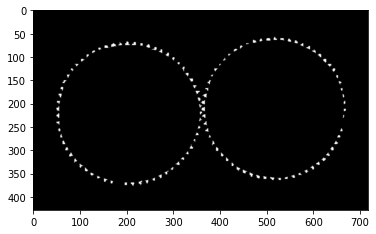

In [686]:
B8 = cv2.bitwise_and(B, B7)
plt.imshow(B8)

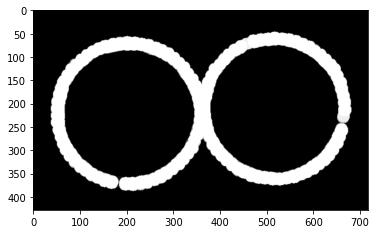

In [687]:
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (25, 25))
B9 = cv2.dilate(B8, tip_spacing)
plt.imshow(B9)

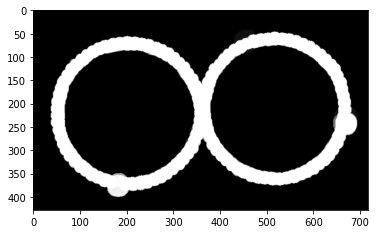

In [688]:
defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (40, 40))
B10 = cv2.subtract(B7, B9)
B11 = cv2.dilate(B10, defect_cue)
result = cv2.bitwise_or(B11, B9)
plt.imshow(result)